In [1]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
train_data = pd.read_csv('loan_sanction_train.csv')
test_data = pd.read_csv('loan_sanction_test.csv')


How to explore and understand the dataset for Generalized Linear Models?

In [2]:
# Display basic information about the training data
print("Training Data Information:")
print(train_data.info())

# Display first few rows of the training data
print("\nFirst Few Rows of Training Data:")
print(train_data.head())


Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

First Few Rows of Training Data:
    Loan_ID Gender Married Dependents     Educ

How to handle missing values in the dataset for Generalized Linear Models?

In [3]:
# Check for missing values in the training data
print("Missing Values in Training Data:")
print(train_data.isnull().sum())

# Handle missing values (fill with mean, median, or mode)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

# Check if missing values are handled
print("\nMissing Values After Handling:")
print(train_data.isnull().sum())


Missing Values in Training Data:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing Values After Handling:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


How to encode categorical variables for Generalized Linear Models?

In [5]:
# Encode categorical variables using one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Display the encoded data
print("Encoded Training Data:")
print(train_data_encoded.head())


Encoded Training Data:
    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001002             5849                0.0  146.412162             360.0   
1  LP001003             4583             1508.0  128.000000             360.0   
2  LP001005             3000                0.0   66.000000             360.0   
3  LP001006             2583             2358.0  120.000000             360.0   
4  LP001008             6000                0.0  141.000000             360.0   

   Credit_History Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0             1.0           Y         True        False         False   
1             1.0           N         True         True          True   
2             1.0           Y         True         True         False   
3             1.0           Y         True         True         False   
4             1.0           Y         True        False         False   

   Dependents_2  Dependents_3+  Education_Not Gradu

How to split the dataset into training and testing sets for Generalized Linear Models?

In [6]:
# Separate features and target variable
X = train_data_encoded.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_data_encoded['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (491, 14) (491,)
Testing set shape: (123, 14) (123,)


How to train a Generalized Linear Model and make predictions?

In [7]:
# Initialize the model (Logistic Regression)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display accuracy and other metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.7560975609756098

Confusion Matrix:
[[14 29]
 [ 1 79]]

Classification Report:
              precision    recall  f1-score   support

           N       0.93      0.33      0.48        43
           Y       0.73      0.99      0.84        80

    accuracy                           0.76       123
   macro avg       0.83      0.66      0.66       123
weighted avg       0.80      0.76      0.72       123



How to scale numerical features for Generalized Linear Models?

In [8]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
X_test_scaled = scaler.transform(X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

# Replace original columns with scaled columns
X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = X_train_scaled
X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = X_test_scaled

# Display the scaled features
print("Scaled Training Data:")
print(X_train.head())


Scaled Training Data:
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
83          0.083915           0.180667    1.349992             360.0   
90         -0.429338           0.385430   -0.204748             360.0   
227         0.126095           0.005831    0.711852             360.0   
482        -0.576970           0.464185   -0.239556             360.0   
464        -0.225522          -0.528127   -0.587632             360.0   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
83              1.0         True         True         False         False   
90              1.0         True         True         False         False   
227             1.0         True         True         False          True   
482             1.0         True         True         False         False   
464             0.0         True        False         False         False   

     Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
83         

How to handle missing values in the test dataset consistently with the training dataset for Generalized Linear Models?

In [9]:
# Handle missing values in the test dataset (using the same logic as in training data)
test_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

# Check if missing values are handled in the test dataset
print("\nMissing Values in Test Data After Handling:")
print(test_data.isnull().sum())



Missing Values in Test Data After Handling:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64


How to encode categorical variables in the test dataset consistently with the training dataset for Generalized Linear Models?

In [11]:
# Encode categorical variables in the test dataset using the same encoding as in training data
test_data_encoded = pd.get_dummies(test_data, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Display the encoded test data
print("\nEncoded Test Data:")
print(test_data_encoded.head())



Encoded Test Data:
    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001015             5720                  0       110.0             360.0   
1  LP001022             3076               1500       126.0             360.0   
2  LP001031             5000               1800       208.0             360.0   
3  LP001035             2340               2546       100.0             360.0   
4  LP001051             3276                  0        78.0             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0         True         True         False         False   
1             1.0         True         True          True         False   
2             1.0         True         True         False          True   
3             1.0         True         True         False          True   
4             1.0         True        False         False         False   

   Dependents_3+  Education_Not Graduate  

How to make predictions on the test dataset using the trained Generalized Linear Model?

In [12]:
# Prepare the test data for predictions
X_test_final = test_data_encoded.drop(['Loan_ID'], axis=1)

# Scale numerical features in the test data
X_test_final_scaled = scaler.transform(X_test_final[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
X_test_final[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = X_test_final_scaled

# Make predictions on the test set
y_test_pred = model.predict(X_test_final)

# Display the predictions
print("\nPredictions on Test Data:")
print(y_test_pred)



Predictions on Test Data:
['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y'

How to interpret the coefficients of the Generalized Linear Model for feature importance?

In [13]:
# Extract and display the coefficients of the trained model
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
print("Coefficients of the Generalized Linear Model:")
print(coefficients)


Coefficients of the Generalized Linear Model:
                    Feature  Coefficient
0           ApplicantIncome    -0.000002
1         CoapplicantIncome    -0.000064
2                LoanAmount    -0.002446
3          Loan_Amount_Term    -0.004979
4            Credit_History     2.335080
5               Gender_Male     0.325185
6               Married_Yes     0.780937
7              Dependents_1    -0.173993
8              Dependents_2     0.325106
9             Dependents_3+     0.072584
10   Education_Not Graduate    -0.231439
11        Self_Employed_Yes     0.067820
12  Property_Area_Semiurban     0.899694
13      Property_Area_Urban    -0.218945


How to visualize the ROC curve for the Generalized Linear Model?

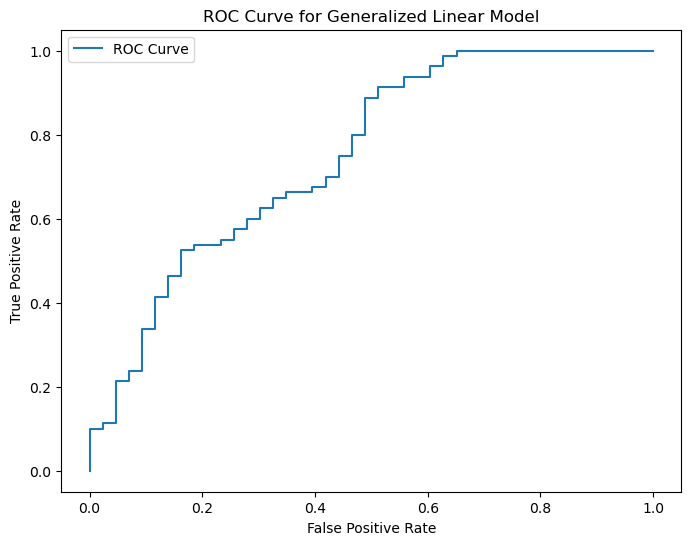

AUC Score: 0.7502906976744186


In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'N' represents the negative class and 'Y' represents the positive class
# Convert 'N' to 0 and 'Y' to 1 in y_test
y_test_binary = y_test.replace({'N': 0, 'Y': 1})

# Get predicted probabilities for the positive class
y_test_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test_binary, y_test_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Generalized Linear Model')
plt.legend()
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_test_binary, y_test_probs)
print("AUC Score:", auc_score)


How to handle class imbalance in the target variable for Generalized Linear Models?

In [16]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Display the shape of resampled data
print("Shape of Resampled Data:", X_resampled.shape, y_resampled.shape)


Shape of Resampled Data: (684, 14) (684,)


How to train and evaluate a Generalized Linear Model with resampled data to handle class imbalance?

In [19]:
# Initialize and train the model with resampled data
model_resampled = LogisticRegression(max_iter=1000)  # Increase max_iter value
model_resampled.fit(X_resampled, y_resampled)

# Make predictions on the original test set
y_pred_resampled = model_resampled.predict(X_test)

# Display accuracy and other metrics for the model with resampled data
print("Accuracy Score with Resampled Data:", accuracy_score(y_test, y_pred_resampled))
print("\nConfusion Matrix with Resampled Data:")
print(confusion_matrix(y_test, y_pred_resampled))
print("\nClassification Report with Resampled Data:")
print(classification_report(y_test, y_pred_resampled))



Accuracy Score with Resampled Data: 0.7317073170731707

Confusion Matrix with Resampled Data:
[[25 18]
 [15 65]]

Classification Report with Resampled Data:
              precision    recall  f1-score   support

           N       0.62      0.58      0.60        43
           Y       0.78      0.81      0.80        80

    accuracy                           0.73       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.73      0.73      0.73       123



How to perform hyperparameter tuning for a Generalized Linear Model using GridSearchCV?

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}  # lbfgs solver supports only 'l2' penalty

# Initialize Logistic Regression model with a higher max_iter
model_gridsearch = LogisticRegression(max_iter=1000, solver='lbfgs')  # Increase max_iter

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model_gridsearch, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


How to retrain the Generalized Linear Model with the best hyperparameters after GridSearchCV?

In [22]:
# Retrain the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_resampled, y_resampled)

# Make predictions on the original test set using the tuned model
y_pred_tuned = best_model.predict(X_test)

# Display accuracy and other metrics for the tuned model
print("Accuracy Score with Tuned Model:", accuracy_score(y_test, y_pred_tuned))
print("\nConfusion Matrix with Tuned Model:")
print(confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report with Tuned Model:")
print(classification_report(y_test, y_pred_tuned))


Accuracy Score with Tuned Model: 0.7317073170731707

Confusion Matrix with Tuned Model:
[[25 18]
 [15 65]]

Classification Report with Tuned Model:
              precision    recall  f1-score   support

           N       0.62      0.58      0.60        43
           Y       0.78      0.81      0.80        80

    accuracy                           0.73       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.73      0.73      0.73       123



How to handle outliers in numerical features before training a Generalized Linear Model?

In [28]:
import numpy as np

# Identify and handle outliers using IQR (Interquartile Range)
Q1 = np.percentile(X_train, 25, axis=0)
Q3 = np.percentile(X_train, 75, axis=0)
IQR = Q3 - Q1

# Remove outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_condition = (X_train >= lower_bound) & (X_train <= upper_bound)
X_train_no_outliers = X_train[outlier_condition.all(axis=1)]

# Display the shape before and after removing outliers
print("Shape before removing outliers:", X_train.shape)
print("Shape after removing outliers:", X_train_no_outliers.shape)


Shape before removing outliers: (491, 14)
Shape after removing outliers: (104, 14)


How to handle skewed distributions in numerical features for Generalized Linear Models?

In [29]:
# Apply log transformation to handle skewed distributions
X_train_log_transformed = X_train.apply(lambda x: np.log1p(x) if x.dtype == 'float64' else x)

# Display the log-transformed features
print("Log-Transformed Training Data:")
print(X_train_log_transformed.head())


Log-Transformed Training Data:
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
83              6000           7.719130    5.583496          5.888878   
90              2958           7.972811    4.882802          5.888878   
227             6250           7.436028    5.351858          5.888878   
482             2083           8.055475    4.859812          5.888878   
464             4166           0.000000    4.595120          5.888878   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
83         0.693147         True         True         False         False   
90         0.693147         True         True         False         False   
227        0.693147         True         True         False          True   
482        0.693147         True         True         False         False   
464        0.000000         True        False         False         False   

     Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
83

How to assess the importance of features in a Generalized Linear Model using feature importance scores?

In [30]:
# Extract and display feature importance scores
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance Scores:")
print(feature_importance)


Feature Importance Scores:
                    Feature  Importance
4            Credit_History    2.931617
6               Married_Yes    0.820280
12  Property_Area_Semiurban    0.582889
8              Dependents_2    0.354194
9             Dependents_3+    0.159009
13      Property_Area_Urban    0.071423
11        Self_Employed_Yes    0.065269
0           ApplicantIncome    0.000016
1         CoapplicantIncome   -0.000051
3          Loan_Amount_Term   -0.002410
2                LoanAmount   -0.003031
5               Gender_Male   -0.156036
10   Education_Not Graduate   -0.553345
7              Dependents_1   -0.906219


How to visualize the decision boundary of a Generalized Linear Model?

C:\Users\saads\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


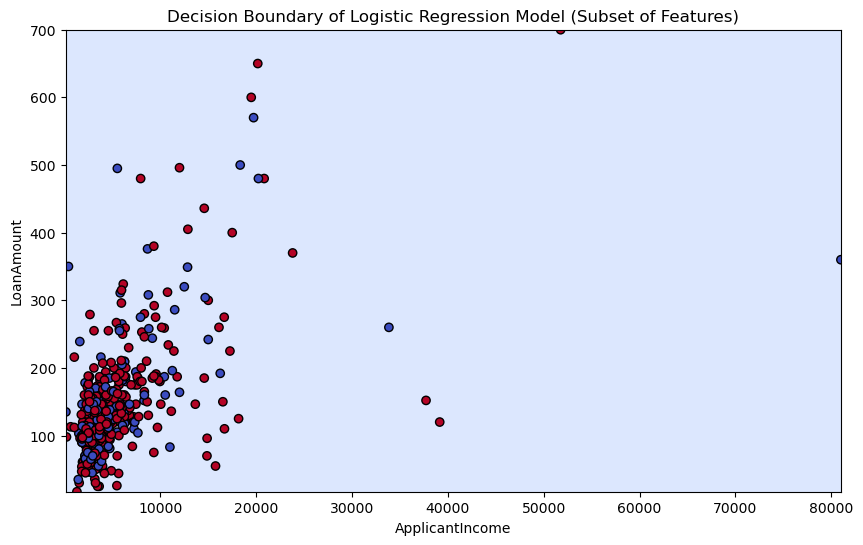

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming X_train has only 'ApplicantIncome' and 'LoanAmount' features
X_train_subset = X_train[['ApplicantIncome', 'LoanAmount']]

# Create and train a logistic regression model with only two features
subset_model = LogisticRegression()
subset_model.fit(X_train_subset, (y_train == 'Y').astype(int))  # Convert labels to 0 and 1

# Extract coefficients and intercept from the trained model
coef = subset_model.coef_[0]
intercept = subset_model.intercept_[0]

# Plot decision boundary
plt.figure(figsize=(10, 6))

# Plot decision boundary for two features
feature1 = 'ApplicantIncome'
feature2 = 'LoanAmount'

x_min, x_max = X_train[feature1].min(), X_train[feature1].max()
y_min, y_max = X_train[feature2].min(), X_train[feature2].max()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = subset_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Ensure the result is a numeric array
Z = Z.astype(float)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Scatter plot of the training data
plt.scatter(X_train[feature1], X_train[feature2], c=(y_train == 'Y'), cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundary of Logistic Regression Model (Subset of Features)')
plt.show()


How to handle multicollinearity in features before training a Generalized Linear Model?

In [42]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X_train is your input data
# Convert non-numeric columns to numeric or exclude them
numeric_cols = X_train.select_dtypes(include=['number']).columns
X_train_numeric = X_train[numeric_cols]

# Check for missing values in X_train_numeric
missing_values = X_train_numeric.isnull().sum()
if missing_values.sum() > 0:
    # Handle missing values (e.g., imputation or removal of columns with missing values)
    X_train_numeric = X_train_numeric.dropna()

# Calculate Variance Inflation Factor (VIF) for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

# Display the VIF values
print("VIF Values for Features:")
print(vif_data)


VIF Values for Features:
             Feature       VIF
0    ApplicantIncome  2.827781
1  CoapplicantIncome  1.416363
2         LoanAmount  6.164216
3   Loan_Amount_Term  7.597286
4     Credit_History  5.738960


Summary Statistics for Numerical Features:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  

Count of Unique Values for Categorical Features:
Loan_ID        

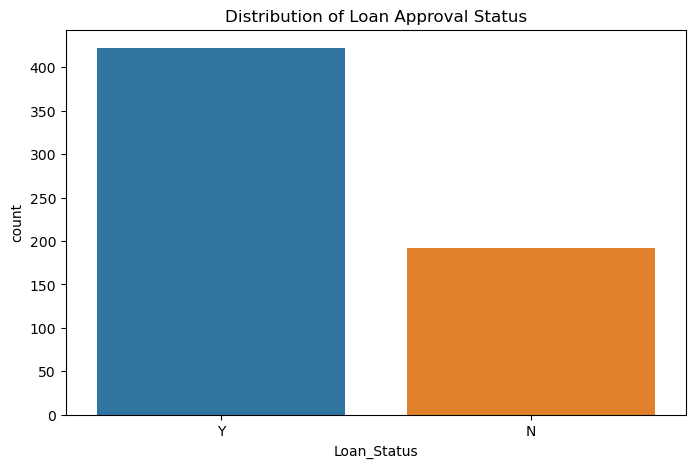

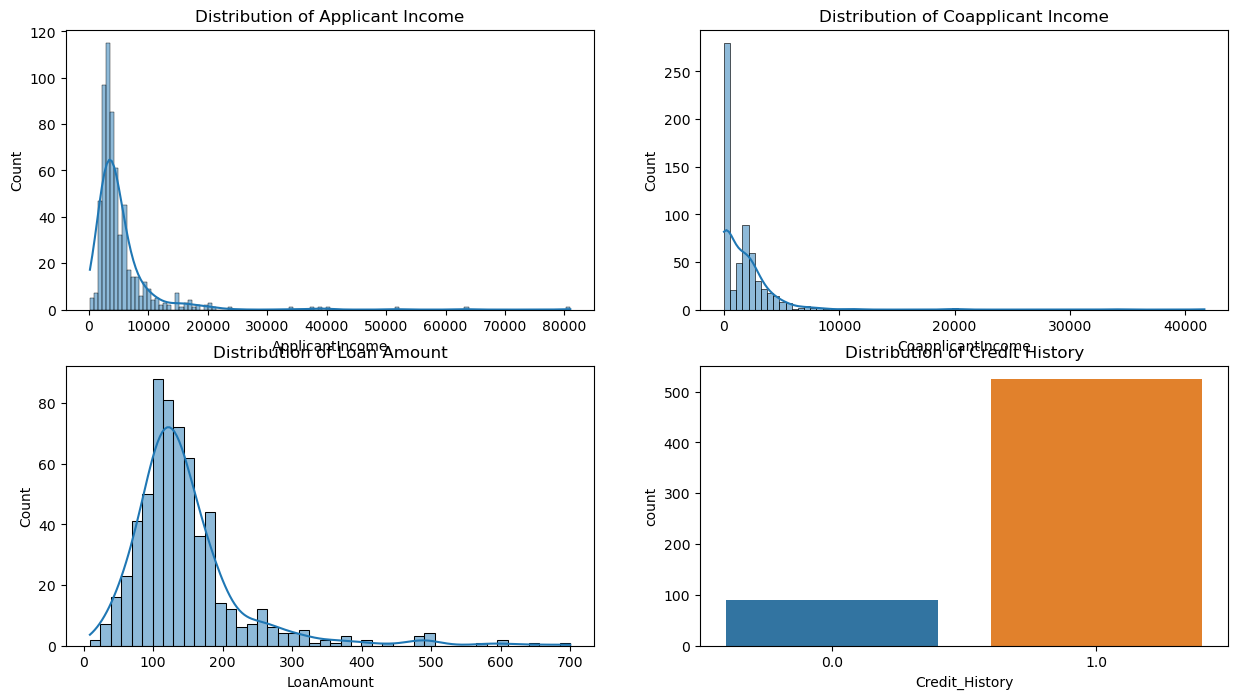

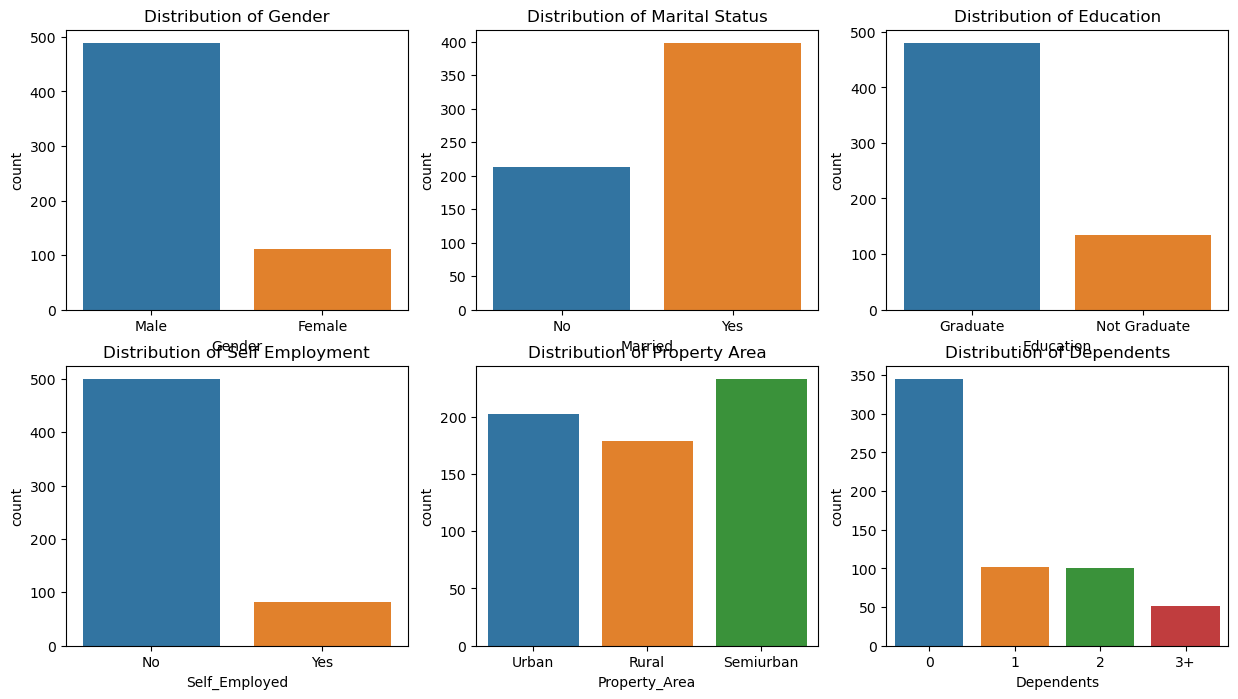

In [43]:
# Display summary statistics for numerical features
print("Summary Statistics for Numerical Features:")
print(train_data.describe())

# Display count of unique values for categorical features
print("\nCount of Unique Values for Categorical Features:")
print(train_data.select_dtypes(include='object').nunique())

# Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Loan_Status', data=train_data)
plt.title('Distribution of Loan Approval Status')
plt.show()

# Visualize the distribution of key numerical features
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.histplot(train_data['ApplicantIncome'], kde=True)
plt.title('Distribution of Applicant Income')

plt.subplot(2, 2, 2)
sns.histplot(train_data['CoapplicantIncome'], kde=True)
plt.title('Distribution of Coapplicant Income')

plt.subplot(2, 2, 3)
sns.histplot(train_data['LoanAmount'].dropna(), kde=True)
plt.title('Distribution of Loan Amount')

plt.subplot(2, 2, 4)
sns.countplot(x='Credit_History', data=train_data)
plt.title('Distribution of Credit History')
plt.show()

# Visualize the distribution of categorical features
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=train_data)
plt.title('Distribution of Gender')

plt.subplot(2, 3, 2)
sns.countplot(x='Married', data=train_data)
plt.title('Distribution of Marital Status')

plt.subplot(2, 3, 3)
sns.countplot(x='Education', data=train_data)
plt.title('Distribution of Education')

plt.subplot(2, 3, 4)
sns.countplot(x='Self_Employed', data=train_data)
plt.title('Distribution of Self Employment')

plt.subplot(2, 3, 5)
sns.countplot(x='Property_Area', data=train_data)
plt.title('Distribution of Property Area')

plt.subplot(2, 3, 6)
sns.countplot(x='Dependents', data=train_data)
plt.title('Distribution of Dependents')
plt.show()
